# 观察镜

使用鼠标事件模拟观察镜来检查数据的示例。

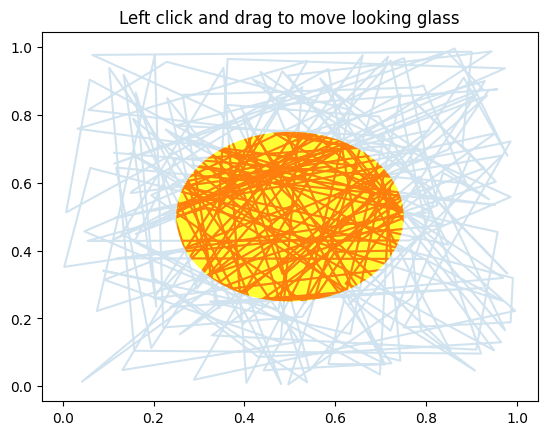

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.patches as patches

# Fixing random state for reproducibility
np.random.seed(19680801)

x, y = np.random.rand(2, 200)

fig, ax = plt.subplots()
circ = patches.Circle((0.5, 0.5), 0.25, alpha=0.8, fc='yellow')
ax.add_patch(circ)


ax.plot(x, y, alpha=0.2)
line, = ax.plot(x, y, alpha=1.0, clip_path=circ)
ax.set_title("Left click and drag to move looking glass")


class EventHandler:
    def __init__(self):
        fig.canvas.mpl_connect('button_press_event', self.on_press)
        fig.canvas.mpl_connect('button_release_event', self.on_release)
        fig.canvas.mpl_connect('motion_notify_event', self.on_move)
        self.x0, self.y0 = circ.center
        self.pressevent = None

    def on_press(self, event):
        if event.inaxes != ax:
            return

        if not circ.contains(event)[0]:
            return

        self.pressevent = event

    def on_release(self, event):
        self.pressevent = None
        self.x0, self.y0 = circ.center

    def on_move(self, event):
        if self.pressevent is None or event.inaxes != self.pressevent.inaxes:
            return

        dx = event.xdata - self.pressevent.xdata
        dy = event.ydata - self.pressevent.ydata
        circ.center = self.x0 + dx, self.y0 + dy
        line.set_clip_path(circ)
        fig.canvas.draw()

handler = EventHandler()
plt.show()